# Import the training log files

In [1]:
import ast

In [3]:
log_paths = ['/Users/aurelien/PycharmProjects/spinorhelicity/experiments/npt8-infos/train.log',
            '/Users/aurelien/PycharmProjects/spinorhelicity/experiments/npt8/train.log']
name_exp = ['8pt with IDs', '8pt without IDs']

log_paths = ['/Users/aurelien/PycharmProjects/spinorhelicity/experiments/factorization/train.log']
name_exp = ["Factorization Task"]

In [4]:
all_lines = []

for log_path in log_paths:

  logfile = open(log_path, 'r')
  lines = logfile.read().splitlines()
  all_lines.append(lines)
  logfile.close()
    
full_important_lines = []
for lines in all_lines:
  important_lines = []
  for line in lines:
    if '__log__:' in line:
      important_lines.append(ast.literal_eval(line.split('__log__:')[1]))
  full_important_lines.append(important_lines)

### Check that we get the data by reading the final accuracy value

In [5]:
task = 'spin_hel'
full_important_lines[0][0]['test_'+task+'_acc']

0.0

# Plot the Results

In [6]:
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
#plt.style.use('classic')
plt.style.use('seaborn-whitegrid')

### Accuracy plot as a function of the epoch number

In [7]:
full_epochs = []
full_valid_acc = []
full_test_acc = []

for important_lines in full_important_lines:

  epochs = []
  valid_acc = []
  test_acc = []

  for line in important_lines:
    epochs.append(line['epoch'])
    valid_acc.append(line['valid_'+task+'_acc'])
    test_acc.append(line['test_'+task+'_acc'])
  
  full_epochs.append(epochs)
  full_valid_acc.append(valid_acc)
  full_test_acc.append(test_acc)

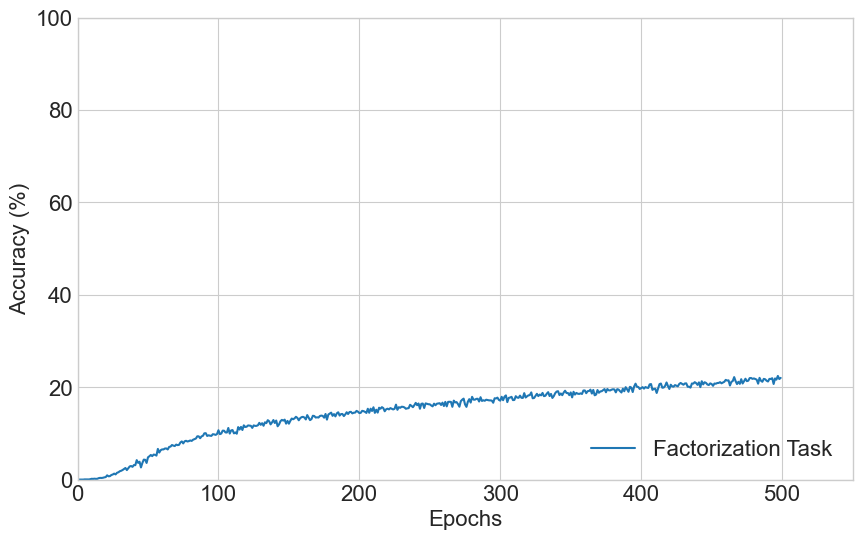

In [13]:
fig, axes = plt.subplots(1,1,figsize=(10,6))
plt.rcParams.update({'font.size': 16}) 
#fig.suptitle('Training accuracy - validation set',fontsize='15')

for i, name in enumerate(name_exp):

  axes.plot(full_epochs[i], full_valid_acc[i], label=name_exp[i])

axes.legend(loc='lower right',fontsize='16')
axes.set_xlabel('Epochs',fontsize='16')
plt.xlim([0, 550])
plt.ylim([0, 100])
axes.set_ylabel('Accuracy (%)',fontsize='16')
plt.show
plt.savefig('/Users/aurelien/Documents/Projects/Spinor_helicity/pictures/factorization/train_accuracy.pdf')
plt.savefig('/Users/aurelien/Documents/Projects/Spinor_helicity/pictures/factorization/train_accuracy.png')

### Loss plot as a function of the epoch number

In [9]:
full_epochs = []
full_valid_loss = []
full_test_loss = []

for important_lines in full_important_lines:

  epochs = []
  valid_loss = []
  test_loss = []

  for line in important_lines:
    epochs.append(line['epoch'])
    valid_loss.append(line['valid_'+task+'_xe_loss'])
    test_loss.append(line['test_'+task+'_xe_loss'])
  
  full_epochs.append(epochs)
  full_valid_loss.append(valid_loss)
  full_test_loss.append(test_loss)

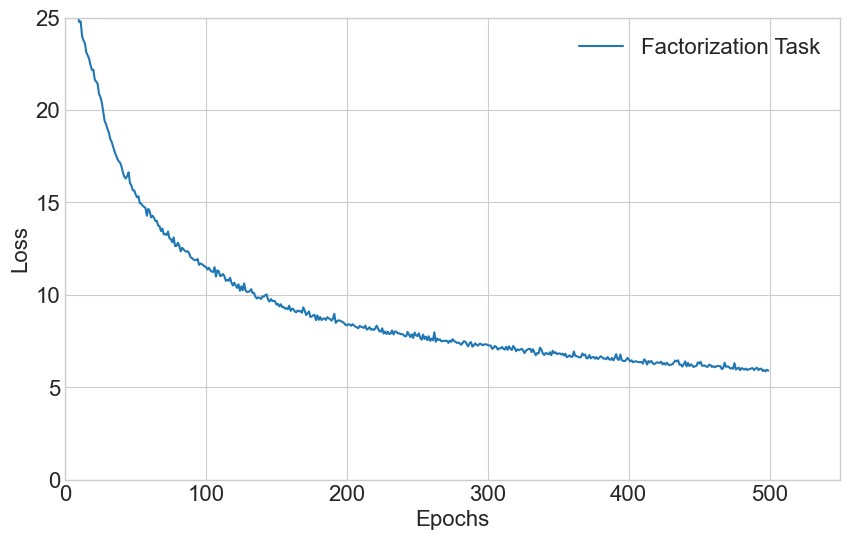

In [14]:
fig, axes = plt.subplots(1,1,figsize=(10,6))
#fig.suptitle('Loss accuracy - validation set',fontsize='15')

for i, name in enumerate(name_exp):

  axes.plot(full_epochs[i], full_valid_loss[i], label=name_exp[i])

axes.legend(loc='upper right',fontsize='16')
axes.set_xlabel('Epochs',fontsize='16')
axes.set_ylabel('Loss',fontsize='16')
plt.xlim([0, 550])
plt.ylim([0, 25])
plt.show
plt.savefig('/Users/aurelien/Documents/Projects/Spinor_helicity/pictures/factorization/train_loss.pdf')
plt.savefig('/Users/aurelien/Documents/Projects/Spinor_helicity/pictures/factorization/train_loss.png')

### Final accuracy as a function of input length

In [12]:
full_cat_num_valid = []
full_valid_values = []
full_cat_num_test = []
full_test_values = []

for important_lines in full_important_lines:

  cat_num_valid = []
  valid_values = []
  cat_num_test = []
  test_values = []

  for key, value in important_lines[-1].items():
    if 'valid_'+task+'_acc_' in key:
      cat_num_valid.append(int(key.split('valid_'+task+'_acc_')[1]))
      valid_values.append(value)
    
    if 'test_'+task+'_acc_' in key:
      cat_num_test.append(int(key.split('test_'+task+'_acc_')[1]))
      test_values.append(value)
  
  full_cat_num_valid.append(cat_num_valid)
  full_valid_values.append(valid_values)
  full_cat_num_test.append(cat_num_test)
  full_test_values.append(test_values)

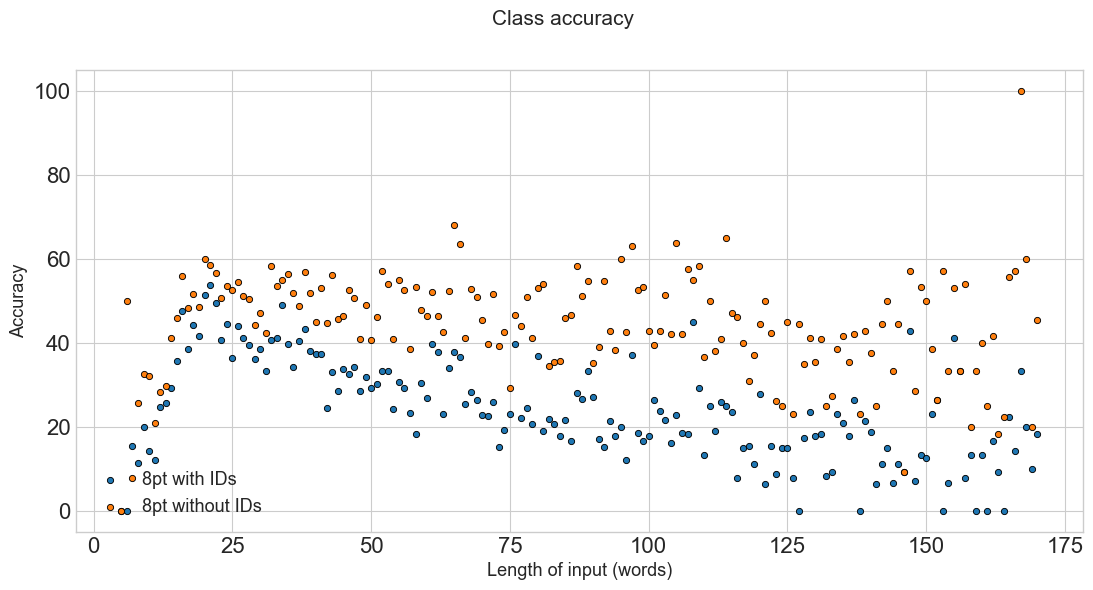

In [13]:
colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]

fig, axes = plt.subplots(1,1,figsize=(13,6))
fig.suptitle('Class accuracy',fontsize='15')

for i, name in enumerate(name_exp):

  axes.scatter(full_cat_num_valid[i], full_valid_values[i], label=name_exp[i],s=20,edgecolors='black',linewidth=0.65, c= colors[i])

axes.legend(loc='lower left',fontsize='13')
axes.set_xlabel('Length of input (words)',fontsize='13')
axes.set_ylabel('Accuracy',fontsize='13')
plt.show
plt.savefig('/Users/aurelien/Documents/Projects/Spinor_helicity/pictures/npt8_exp1/train_class.pdf')
plt.savefig('/Users/aurelien/Documents/Projects/Spinor_helicity/pictures/npt8_exp1/train_class.png')

# Import the evaluation log files

In [100]:
eval_file_num = '/Users/aurelien/PycharmProjects/spinorhelicity/experiments/dumped/Test_eval_spin_hel/npt8-infos_b1n/eval.spin_hel.valid.0'
eval_file_symb ='/Users/aurelien/PycharmProjects/spinorhelicity/experiments/dumped/Test_eval_spin_hel/npt8-infos_b1s/eval.spin_hel.valid.0'
name_exp = 'Npt8 with IDs'
bs = 1
bl = 4

In [101]:
def read_file(log_path):
    if log_path is None:
        return None
    
    all_lines = []
    logfile = open(log_path, 'r')
    lines = logfile.read().splitlines()
    all_lines.append(lines)
    logfile.close()
    
    return all_lines

eval_lines_num = read_file(eval_file_num)[0]
eval_lines_symb = read_file(eval_file_symb)[0]

In [102]:
def split_into_eq(lines, beam_size, base_length):
    
    if lines is None:
        return None
    
    return [lines[i:i+beam_size+base_length] for i in range(0, len(lines), beam_size+base_length)]

equations_eval_num = split_into_eq(eval_lines_num, bs, bl)
equations_eval_symb = split_into_eq(eval_lines_symb, bs, bl)

In [103]:
import re
import pandas as pd

def construct_info_equations(equations_list):
    """
    Construct the vector with all of the necessary information regarding the evaluation run
    Length of input/ output / number of scrambles and validity of the hypothesis
    """
    
    if equations_list is None:
        return None
    
    list_info = []
    
    for equation in equations_list:
        dict_info = {}
        dict_info['Eq_ID'] = int(equation[0].split('n ')[1].split(' (')[0])
        dict_info['In_len'] = equation[1].count('ab') + equation[1].count('sb')
        dict_info['Out_len'] = equation[2].count('ab') + equation[2].count('sb')
        dict_info['Num_IDs'] = equation[2].count('/A') + equation[2].count('/M') + equation[2].count('/S')
        dict_info['Valid'] = int(equation[0].split('/')[0][-1]) * 100
        
        list_info.append(dict_info)
    
    return pd.DataFrame.from_records(list_info)


info_eq_num = construct_info_equations(equations_eval_num)
info_eq_symb = construct_info_equations(equations_eval_symb)

def merge_info(info_num, info_symb):
    if info_symb is None:
        return info_num
    
    else:
        info_num['Valid_symb'] = info_symb['Valid']
        return info_num

info_eq = merge_info(info_eq_num, info_eq_symb)

In [113]:
def print_stats(info_frame):
    """
    Print the overall statistics over the evaluation run
    """
    print("Inputs had a mean length of {:0.2f}".format(info_frame['In_len'].mean()))
    print("Outputs had a mean length of {:0.2f}".format(info_frame['Out_len'].mean()))
    print("We used {:0.2f} identities on average".format(info_frame['Num_IDs'].mean()))
    print("Mean numerical accuracy : {:0.2f} %".format(info_frame['Valid'].mean()))
    
    if 'Valid_symb' in list(info_frame.columns):
            print("Mean symbolic accuracy : {:0.2f} %".format(info_frame['Valid_symb'].mean()))

    
print_stats(info_eq)

Inputs had a mean length of 24.74
Outputs had a mean length of 8.58
We used 2.94 identities on average
Mean numerical accuracy : 78.45 %
Mean symbolic accuracy : 49.47 %


In [130]:
import seaborn as sns
import matplotlib.pyplot as plt


def print_accuracy_group(info_frame, column_metric):
    
    group_frame = info_frame.groupby([column_metric]).mean()
    group_frame.reset_index(inplace=True)
    
    fig, ax = plt.subplots(figsize=(10, 6))
    
    plt.rcParams.update({'font.size': 18}) 
    plt.style.use('seaborn-whitegrid')
    
    sns.lineplot(data=group_frame, x=column_metric, y='Valid',  linestyle='dashed', marker='o', legend='brief', label='Numerical matching')
    
    if 'Valid_symb' in list(info_frame.columns):
        sns.lineplot(data=group_frame, x=column_metric, y='Valid_symb',  linestyle='dashed', marker='o', legend='brief', label='Symbolic matching')


    
    plt.ylabel("Correct prediction (%)",fontsize=18)
    plt.xlabel(column_metric, fontsize=18)
    plt.ylim([0, 100])
    #plt.savefig("solved_simple_lines.pdf", bbox_inches='tight')
    #files.download("solved_simple_lines.pdf") 
    plt.show()

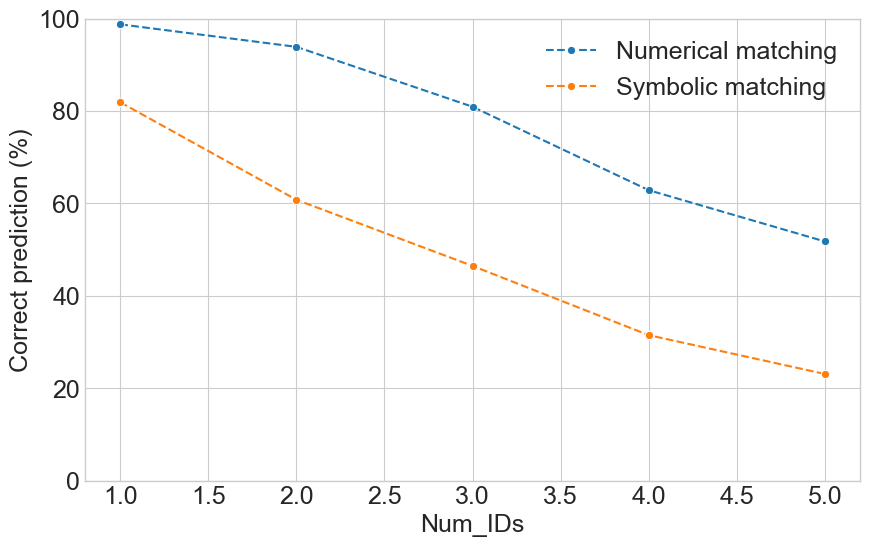

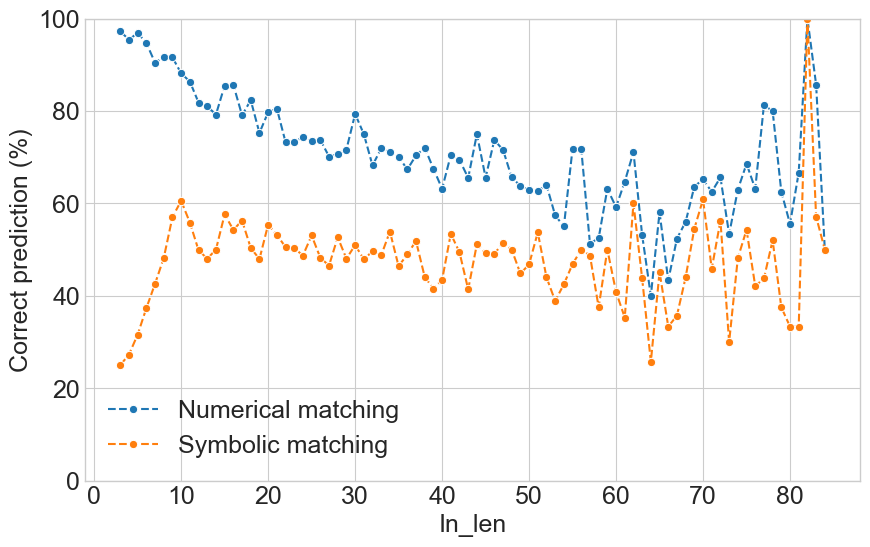

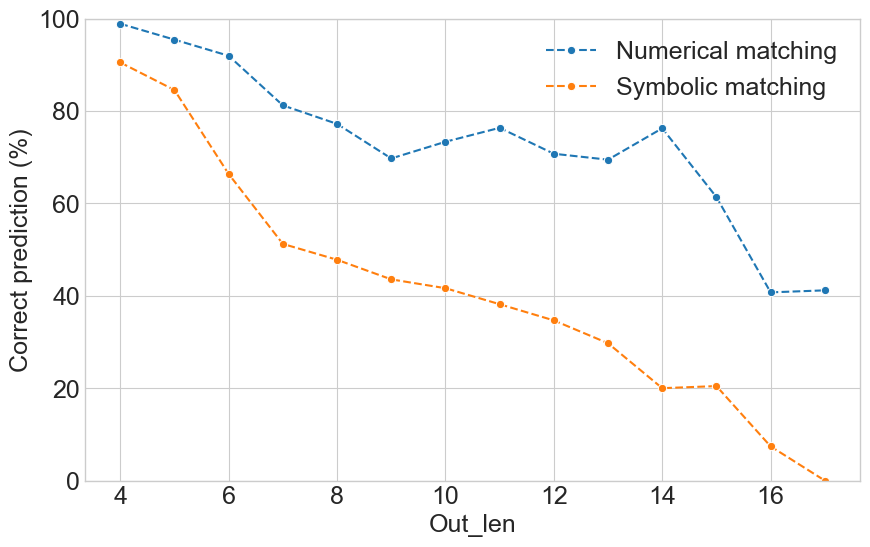

In [131]:
print_accuracy_group(info_eq, 'Num_IDs')
print_accuracy_group(info_eq, 'In_len')
print_accuracy_group(info_eq, 'Out_len')